In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/wsnds/WSN-DS.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


df = pd.read_csv('/kaggle/input/wsnds/WSN-DS.csv')


In [3]:
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [4]:
df.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

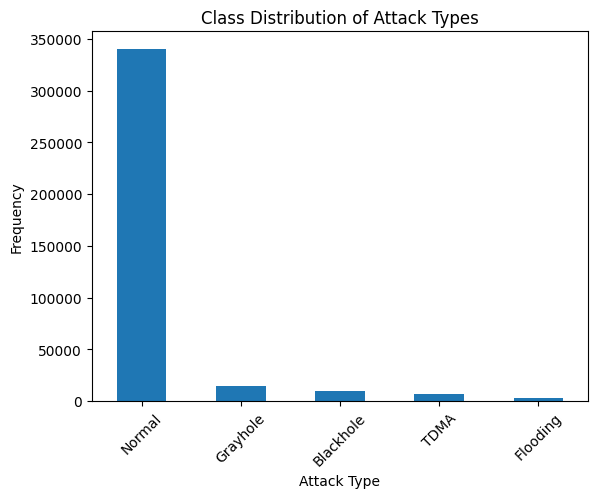

In [5]:
# Checking class distribution of the 'Attack type' column
df['Attack type'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Checking class distribution of the 'Attack type' column
attack_type_counts = df['Attack type'].value_counts()
print(attack_type_counts)


Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64


In [7]:
# Separating features and target
X = df.drop('Attack type', axis=1)
y = df['Attack type']

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the new class distribution after resampling
print(y_resampled.value_counts())

Attack type
Normal       340066
Flooding     340066
TDMA         340066
Grayhole     340066
Blackhole    340066
Name: count, dtype: int64


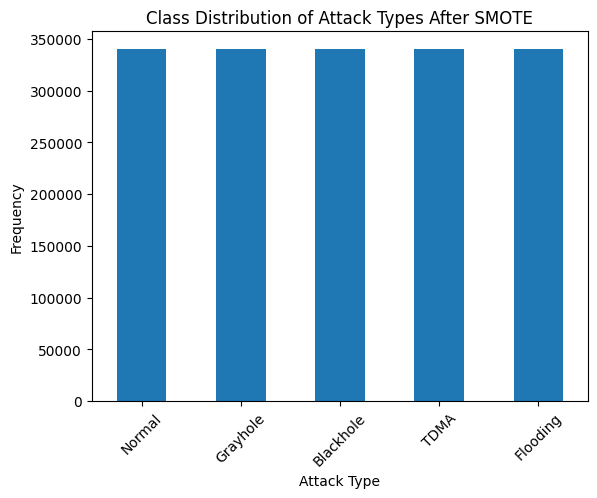

In [8]:
# Define the desired order of attack types
order = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

# Plotting the class distribution after SMOTE with specified order
y_resampled.value_counts().reindex(order).plot(kind='bar')
plt.title('Class Distribution of Attack Types After SMOTE')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [9]:

# Separate majority and minority classes
df_normal = df[df['Attack type'] == 'Normal']
df_flooding = df[df['Attack type'] == 'Flooding']
df_tdma = df[df['Attack type'] == 'TDMA']
df_grayhole = df[df['Attack type'] == 'Grayhole']
df_blackhole = df[df['Attack type'] == 'Blackhole']

# Resample minority classes
df_flooding_resampled = resample(df_flooding, replace=True, n_samples=len(df_normal), random_state=42)
df_tdma_resampled = resample(df_tdma, replace=True, n_samples=len(df_normal), random_state=42)
df_grayhole_resampled = resample(df_grayhole, replace=True, n_samples=len(df_normal), random_state=42)
df_blackhole_resampled = resample(df_blackhole, replace=True, n_samples=len(df_normal), random_state=42)

# Combine majority class with resampled minority classes
df_balanced = pd.concat([df_normal, df_flooding_resampled, df_tdma_resampled, df_grayhole_resampled, df_blackhole_resampled])

# Verify the new class distribution
print(df_balanced['Attack type'].value_counts())

# Now proceed with the previous steps (scaling and train-test split)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Define feature set (X) and target (y)
X = df_balanced.drop(columns=['Attack type'])
y = df_balanced['Attack type']

# Step 2: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling using StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now the data is ready for model training


Attack type
Normal       340066
Flooding     340066
TDMA         340066
Grayhole     340066
Blackhole    340066
Name: count, dtype: int64


In [10]:
# Step 4: Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Step 5: Train the model
logreg.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Step 7: Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8990284238941852

Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.72      1.00      0.83     67911
    Flooding       1.00      1.00      1.00     67913
    Grayhole       0.95      0.59      0.73     68132
      Normal       0.94      0.97      0.96     67695
        TDMA       0.99      0.93      0.96     68415

    accuracy                           0.90    340066
   macro avg       0.92      0.90      0.90    340066
weighted avg       0.92      0.90      0.90    340066


Confusion Matrix:
 [[67823     0    88     0     0]
 [    0 67817    51    45     0]
 [27006     0 40398     4   724]
 [    0    84  1582 65916   113]
 [   28     0   276  4336 63775]]


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
# Step 1: Define feature set (X) and target (y)
X = df_balanced.drop(columns=['Attack type'])
y = df_balanced['Attack type']

# Step 2: Train-Test Split (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 4: Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Step 7: Classification Report and Confusion Matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9994471661383378
Classification Report:
              precision    recall  f1-score   support

   Blackhole       1.00      1.00      1.00     67911
    Flooding       1.00      1.00      1.00     67913
    Grayhole       1.00      1.00      1.00     68132
      Normal       1.00      1.00      1.00     67695
        TDMA       1.00      1.00      1.00     68415

    accuracy                           1.00    340066
   macro avg       1.00      1.00      1.00    340066
weighted avg       1.00      1.00      1.00    340066

Confusion Matrix:
[[67911     0     0     0     0]
 [    0 67913     0     0     0]
 [    0     0 68132     0     0]
 [    0    27    46 67507   115]
 [    0     0     0     0 68415]]


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree Classifier with REPTree-like settings
reptree_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_leaf_nodes=None)

# Train the model
reptree_model.fit(X_train, y_train)

# Make predictions
y_pred_reptree = reptree_model.predict(X_test)

# Evaluate the model
accuracy_reptree = accuracy_score(y_test, y_pred_reptree)
confusion_mat_reptree = confusion_matrix(y_test, y_pred_reptree)
classification_rep_reptree = classification_report(y_test, y_pred_reptree)

# Print the results
print(f"Accuracy: {accuracy_reptree}")
print("Classification Report:\n", classification_rep_reptree)
print("Confusion Matrix:\n", confusion_mat_reptree)


Accuracy: 0.999494215828692
Classification Report:
               precision    recall  f1-score   support

   Blackhole       1.00      1.00      1.00     67911
    Flooding       1.00      1.00      1.00     67913
    Grayhole       1.00      1.00      1.00     68132
      Normal       1.00      1.00      1.00     67695
        TDMA       1.00      1.00      1.00     68415

    accuracy                           1.00    340066
   macro avg       1.00      1.00      1.00    340066
weighted avg       1.00      1.00      1.00    340066

Confusion Matrix:
 [[67911     0     0     0     0]
 [    0 67913     0     0     0]
 [    0     0 68132     0     0]
 [    0    22    44 67523   106]
 [    0     0     0     0 68415]]


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the REPTree model (using DecisionTreeClassifier for the REPTree algorithm)
reptree = DecisionTreeClassifier()  # You can adjust parameters if needed

# Step 1: Define feature set (X) and target (y)
X = df_balanced.drop(columns=['Attack type'])
y = df_balanced['Attack type']

# Step 2: Perform k-fold cross-validation
cv_scores = cross_val_score(reptree, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.99850323 0.99354831 0.999109   0.99891492 0.99807096]
Mean cross-validation score: 0.9976292837272764


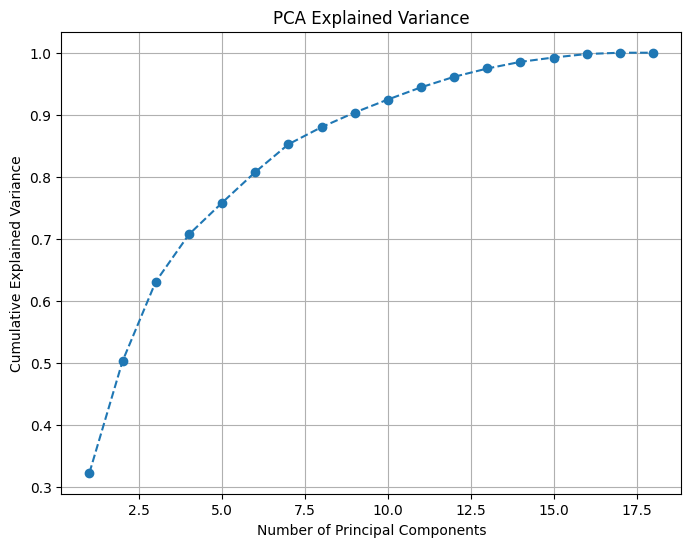

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Standardize the feature set (excluding the target variable 'Attack type')
X = df_balanced.drop(columns=['Attack type'])
y = df_balanced['Attack type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=None)  # None means we will keep all components for now
X_pca = pca.fit_transform(X_scaled)

# Step 3: Plot the explained variance to choose number of components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()



In [16]:

# Optional: Print explained variance for each component
for i, var in enumerate(cumulative_variance):
    print(f"Component {i+1}: {var:.4f} cumulative variance explained")


Component 1: 0.3225 cumulative variance explained
Component 2: 0.5028 cumulative variance explained
Component 3: 0.6307 cumulative variance explained
Component 4: 0.7069 cumulative variance explained
Component 5: 0.7580 cumulative variance explained
Component 6: 0.8075 cumulative variance explained
Component 7: 0.8523 cumulative variance explained
Component 8: 0.8800 cumulative variance explained
Component 9: 0.9035 cumulative variance explained
Component 10: 0.9245 cumulative variance explained
Component 11: 0.9442 cumulative variance explained
Component 12: 0.9612 cumulative variance explained
Component 13: 0.9746 cumulative variance explained
Component 14: 0.9853 cumulative variance explained
Component 15: 0.9923 cumulative variance explained
Component 16: 0.9979 cumulative variance explained
Component 17: 1.0000 cumulative variance explained
Component 18: 1.0000 cumulative variance explained


In [17]:
pca = PCA(n_components=12)

# Apply PCA on both the training and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the shape to ensure dimensionality reduction
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

X_train_pca shape: (1360264, 12)
X_test_pca shape: (340066, 12)


In [18]:
# Train Logistic Regression on PCA-reduced data
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_pca, y_train)



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [19]:
# Train Decision Tree on PCA-reduced data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_pca, y_train)


DecisionTreeClassifier()

In [20]:
# Train REPtree (using a similar randomized tree algorithm) on PCA-reduced data
reptree_model = DecisionTreeClassifier(splitter='random')
reptree_model.fit(X_train_pca, y_train)


DecisionTreeClassifier(splitter='random')

In [21]:
# Test the model and print the performance
y_pred_lr = lr_model.predict(X_test_pca)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression - Accuracy: 0.7073744508418954

Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.61      0.86      0.72     67911
    Flooding       0.80      0.95      0.87     67913
    Grayhole       0.72      0.39      0.51     68132
      Normal       0.69      0.74      0.71     67695
        TDMA       0.75      0.60      0.66     68415

    accuracy                           0.71    340066
   macro avg       0.71      0.71      0.69    340066
weighted avg       0.71      0.71      0.69    340066


Confusion Matrix:
 [[58458     0     0  6970  2483]
 [ 1765 64569   225   834   520]
 [24771  8443 26749  3875  4294]
 [ 1955  2893  6294 50017  6536]
 [ 8361  4643  3662 10988 40761]]


In [22]:

# Test the model and print the performance
y_pred_dt = dt_model.predict(X_test_pca)
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree - Accuracy: 0.9990884122493869

Classification Report:
               precision    recall  f1-score   support

   Blackhole       1.00      1.00      1.00     67911
    Flooding       1.00      1.00      1.00     67913
    Grayhole       1.00      1.00      1.00     68132
      Normal       1.00      1.00      1.00     67695
        TDMA       1.00      1.00      1.00     68415

    accuracy                           1.00    340066
   macro avg       1.00      1.00      1.00    340066
weighted avg       1.00      1.00      1.00    340066


Confusion Matrix:
 [[67911     0     0     0     0]
 [    0 67913     0     0     0]
 [    0     0 68132     0     0]
 [    6    46   102 67385   156]
 [    0     0     0     0 68415]]


In [23]:
# Test the model and print the performance
y_pred_reptree = reptree_model.predict(X_test_pca)
print("REPtree - Accuracy:", accuracy_score(y_test, y_pred_reptree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_reptree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_reptree))

REPtree - Accuracy: 0.9991501649679768

Classification Report:
               precision    recall  f1-score   support

   Blackhole       1.00      1.00      1.00     67911
    Flooding       1.00      1.00      1.00     67913
    Grayhole       1.00      1.00      1.00     68132
      Normal       1.00      1.00      1.00     67695
        TDMA       1.00      1.00      1.00     68415

    accuracy                           1.00    340066
   macro avg       1.00      1.00      1.00    340066
weighted avg       1.00      1.00      1.00    340066


Confusion Matrix:
 [[67911     0     0     0     0]
 [    0 67913     0     0     0]
 [    0     0 68132     0     0]
 [   10    50    84 67406   145]
 [    0     0     0     0 68415]]
